In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("loan_data.csv")
print("print the first 5 records of your data: ")
print("----------------------------------------")

df.head(5)

print the first 5 records of your data: 
----------------------------------------


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:

#Demonstrate the basic different features(count,mean,std,min,max,25:50:75 percentile)
df.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:
#Show the breakdown of credit approval status(relfected in credit policy) In our original data, '1' indicates
#approved and 0 means "not approved"

#Count number of 1s and 0s
print("")
breakdown = df["credit.policy"]
breakdown.value_counts()

1    7710
0    1867
Name: credit.policy, dtype: int64

<AxesSubplot:ylabel='Frequency'>

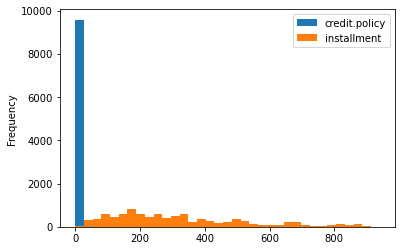

In [4]:
#In a single plot draw the histogram of isntallments "approved" and "not approved", where bins = 35
twodf = df.iloc[:,[0,3]]
twodf.plot.hist(bins=35, by = 'credit.policy')



<AxesSubplot:title={'center':'fico'}, xlabel='credit.policy'>

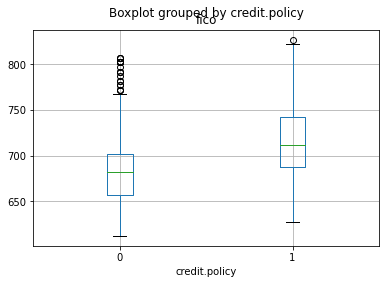

In [5]:
#Illustrate the boxplots of Fico score (relfected in fico) that varies between "approved" and "not approved"
#borrowers
threedf = df.iloc[:,[0,6]]
threedf.boxplot(column = 'fico', by = 'credit.policy')


In [6]:
#1.2 Data preprocessing and model construction
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.model_selection import KFold
y = df.loc[:,'not.fully.paid']
X = df.loc[:,['credit.policy','purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
X = pd.get_dummies(X,columns = ['purpose'])
foldstuff = KFold(n_splits = 10, random_state = 1, shuffle = True)
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
y_train

5224    0
9412    0
7119    0
4244    0
648     1
       ..
1492    0
6682    0
9010    0
3092    0
8349    1
Name: not.fully.paid, Length: 6703, dtype: int64

In [8]:
reg1 = DecisionTreeClassifier(criterion = 'gini')
reg1.fit(X_train, y_train)


DecisionTreeClassifier()

In [9]:
reg2 = DecisionTreeClassifier(criterion = 'entropy')
reg2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
from sklearn.model_selection import cross_val_score
cf1 = cross_val_score(reg1,X_train,y_train,cv=foldstuff,scoring = 'accuracy')
print(cf1)

[0.76304024 0.73174367 0.75111773 0.74179104 0.74328358 0.73432836
 0.71343284 0.72835821 0.72089552 0.73134328]


In [11]:
cf2 = cross_val_score(reg2,X_train,y_train,cv=foldstuff,scoring = 'accuracy')
print(cf2)

[0.73025335 0.71982116 0.7466468  0.77014925 0.74328358 0.75522388
 0.72835821 0.71343284 0.7358209  0.74477612]


In [12]:
#1.2.3 Training a random forest
from sklearn.ensemble import RandomForestClassifier 
fmodel = RandomForestClassifier(bootstrap = True, max_samples = 1000, n_estimators = 10, criterion = 'gini')
fmodel.fit(X_train,y_train)

RandomForestClassifier(max_samples=1000, n_estimators=10)

In [13]:
fm = cross_val_score(fmodel,X_train,y_train,cv=foldstuff,scoring = 'accuracy')
print(fm)

[0.85543964 0.8271237  0.84202683 0.83283582 0.82985075 0.8358209
 0.83283582 0.83134328 0.84029851 0.80447761]


In [14]:
f1model = RandomForestClassifier(bootstrap = True, max_samples = 1000, n_estimators = 10, criterion = 'entropy')
f1model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_samples=1000, n_estimators=10)

In [15]:
f1m = cross_val_score(f1model,X_train,y_train,cv=foldstuff,scoring = 'accuracy')
print(f1m)

[0.85991058 0.83606557 0.84947839 0.84029851 0.82985075 0.84179104
 0.83134328 0.82835821 0.84179104 0.80597015]


In [16]:
#1.3 Performance Evaluation and Analysis
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics

ypred1 = reg1.predict(X_test)

cf = confusion_matrix(y_test,ypred1)
tn = cf[0,0]
fp = cf[0,1]
fn = cf[1,0]
tp = cf[1,1]

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
FMeasure = (2 * precision * recall)/ (precision + recall)

In [17]:
print("Calculations for Gini Decision Tree")
print("The precision is:  ",precision)
print("The recall is: ",recall)
print("FMeasure is: ",FMeasure)

Calculations for Gini Decision Tree
The precision is:   0.20522388059701493
The recall is:  0.23758099352051837
FMeasure is:  0.22022022022022023


In [18]:
ypred2 = reg2.predict(X_test)

cf = confusion_matrix(y_test,ypred2)
tn = cf[0,0]
fp = cf[0,1]
fn = cf[1,0]
tp = cf[1,1]

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
FScore = (2 * precision * recall)/ (precision + recall)

In [19]:
print("Calculations for Information Gain Decision Tree")
print("The precision is:  ",precision)
print("The recall is: ",recall)
print("FScore is: ",FScore)

Calculations for Information Gain Decision Tree
The precision is:   0.21169354838709678
The recall is:  0.2267818574514039
FScore is:  0.21897810218978103


In [20]:
ypred3 = fmodel.predict(X_test)

cf = confusion_matrix(y_test,ypred3)
tn = cf[0,0]
fp = cf[0,1]
fn = cf[1,0]
tp = cf[1,1]

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
FScore = (2 * precision * recall)/ (precision + recall)

In [21]:
print("Calculations for Gini Random Forest")
print("The precision is:  ",precision)
print("The recall is: ",recall)
print("FScore is: ",FScore)

Calculations for Gini Random Forest
The precision is:   0.4358974358974359
The recall is:  0.0367170626349892
FScore is:  0.06772908366533865


In [22]:
ypred4 = f1model.predict(X_test)

cf = confusion_matrix(y_test,ypred4)
tn = cf[0,0]
fp = cf[0,1]
fn = cf[1,0]
tp = cf[1,1]

precision = (tp/(tp+fp))
recall = (tp/(tp+fn))
FScore= (2 * precision * recall)/ (precision + recall)

In [23]:
print("Calculations for Information Gain Random Forest")
print("The precision is:  ",precision)
print("The recall is: ",recall)
print("FScore is: ",FScore)

Calculations for Information Gain Random Forest
The precision is:   0.16129032258064516
The recall is:  0.01079913606911447
FScore is:  0.020242914979757082


In [24]:
#Based off my understanding of the calculations I found the decision trees of gini and information gain to be
#pretty similar however the Information gain(Entropy) tree had slgihtly higher values for each precsion,recall
#and f-score. I also found that the random forest trees had higher precision results compared to the deicion trees
#However the recall and f-score for both gini and information gain were signficantly lower than the deicion trees
#information gain and f-score. I also found that the random ofrest trees for Information and Fini had different values
#for recall and fscore. Where Information Gain had the slightly better results. On the other hand the gini random
#forest tree had a better precision result as compared to the information gain random forest. Overall, based of all the calculation I can conclude that gini provides better
#results than gini rnadom forest tree had the best precision. Information gain decision tree had the best recall
#and fscore. Finally, the gini random forest had the lowest scores for recall and fscore based on the calculated
#results.
